In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('E:\Downloads\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.select_dtypes('object').describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data preprocessing

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#remove Cabin column
df.drop('Cabin',axis=1,inplace=True)

In [10]:
#fill null values in Age and Embarked 
df.Age.fillna(df.Age.median(),inplace=True)
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
#Display unique values
col=['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for i in col:
    print(f'Unique values in {i} =',set(df[i].unique()))

Unique values in Survived = {0, 1}
Unique values in Pclass = {1, 2, 3}
Unique values in Sex = {'female', 'male'}
Unique values in SibSp = {0, 1, 2, 3, 4, 5, 8}
Unique values in Parch = {0, 1, 2, 3, 4, 5, 6}
Unique values in Embarked = {'S', 'Q', 'C'}


In [14]:
#Display count of unique value
for i in col:
    print('\n',df[i].value_counts())


 0    549
1    342
Name: Survived, dtype: int64

 3    491
1    216
2    184
Name: Pclass, dtype: int64

 male      577
female    314
Name: Sex, dtype: int64

 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

 S    646
C    168
Q     77
Name: Embarked, dtype: int64


## Data visualization 

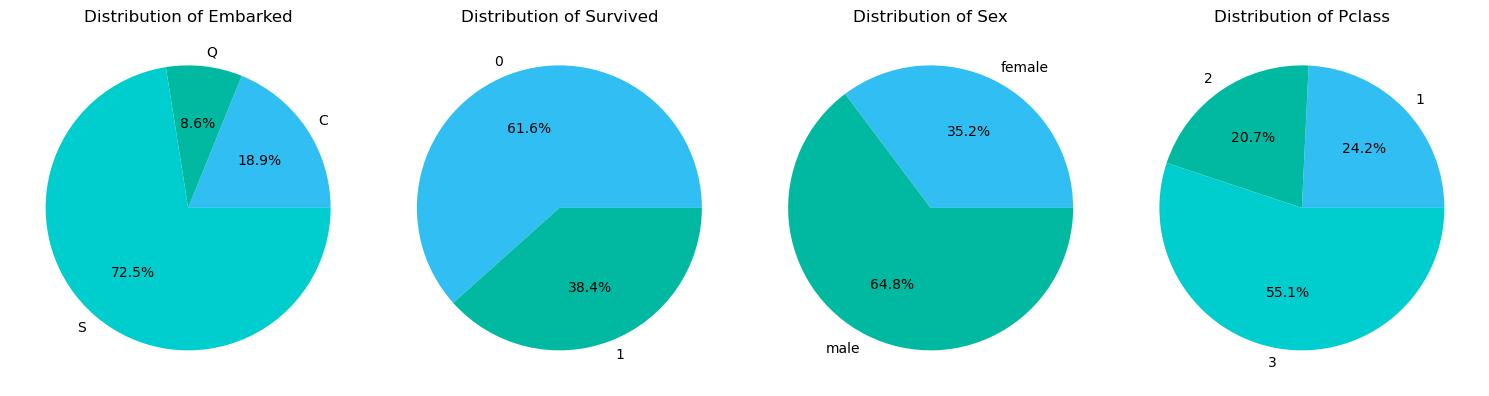

In [15]:
col={'Survived','Sex','Pclass','Embarked'}
plt.figure(figsize=(15,17))
for e,i in enumerate(col):
    g=df.groupby(i).count().reset_index()
    plt.subplot(1,4,e+1)
    plt.pie(g.PassengerId,labels=g[i],autopct="%1.1f%%",colors=['#31BFF3','#00B9A0','#00CDCD'])
    plt.title(f'Distribution of {i}')
    plt.tight_layout()

In [16]:
a=df.groupby(['Survived','Sex']).count().reset_index()
a[a.Survived==1]

,Survived,Sex,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
2,1,female,233,233,233,233,233,233,233,233,233
3,1,male,109,109,109,109,109,109,109,109,109


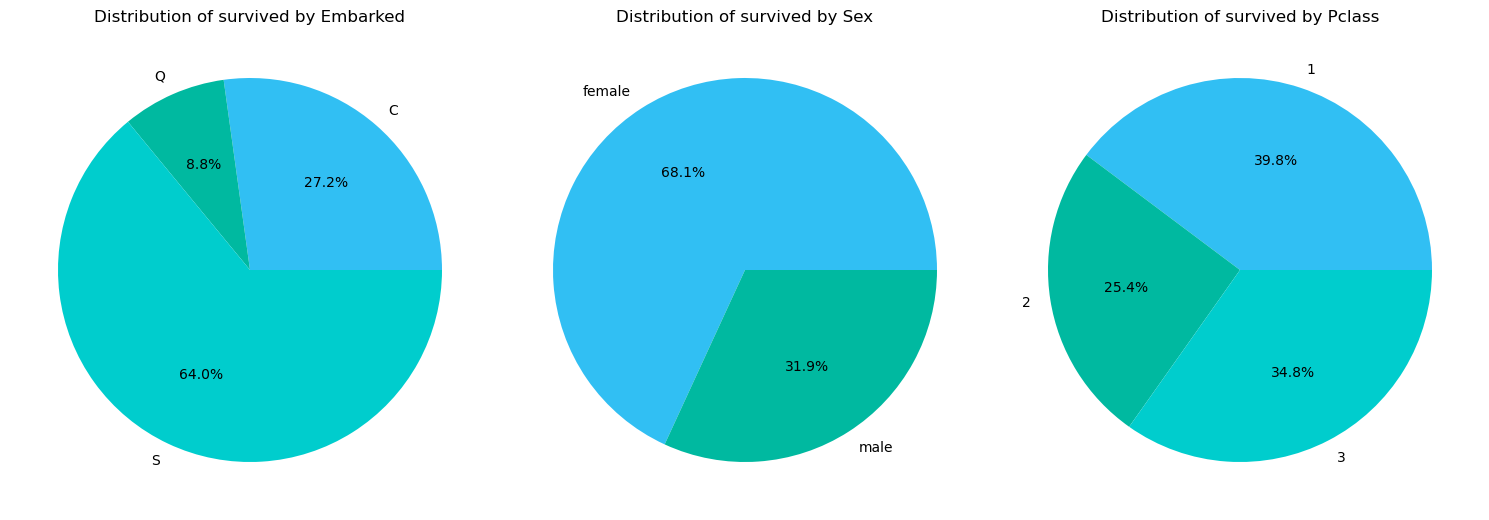

In [17]:
#Display distribution of Survived by Sex , Embarked and Pclass Columns
col={'Sex','Pclass','Embarked'}
plt.figure(figsize=(15,9))
for e,i in enumerate(col):
    plt.subplot(1,3,e+1)
    g=df.groupby(['Survived',i]).count().reset_index()
    g=g[g.Survived==1]
    plt.pie(g.PassengerId,labels=g[i],autopct="%1.1f%%",colors=['#31BFF3','#00B9A0','#00CDCD'])
    plt.title(f'Distribution of survived by {i}')
    plt.tight_layout()

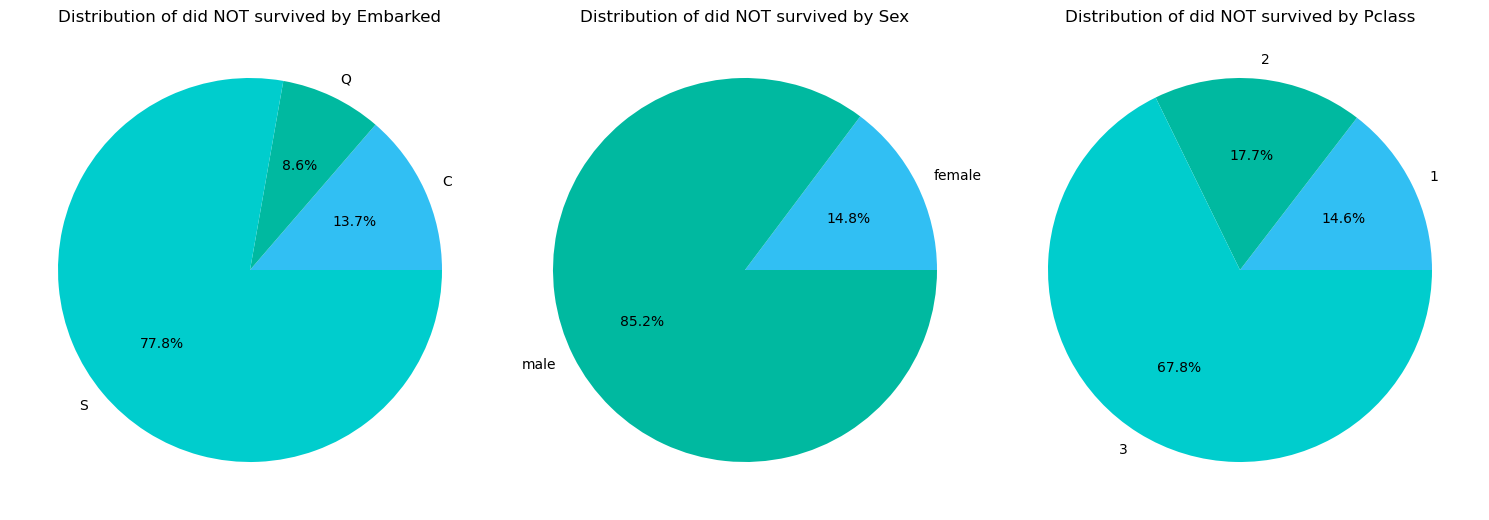

In [18]:
#Display distribution of Did not Survived by Sex , Embarked and Pclass Columns
col={'Sex','Pclass','Embarked'}
plt.figure(figsize=(15,9))
for e,i in enumerate(col):
    plt.subplot(1,3,e+1)
    g=df.groupby(['Survived',i]).count().reset_index()
    g=g[g.Survived==0]
    plt.pie(g.PassengerId,labels=g[i],autopct="%1.1f%%",colors=['#31BFF3','#00B9A0','#00CDCD'])
    plt.title(f'Distribution of did NOT survived by {i}')
    plt.tight_layout()

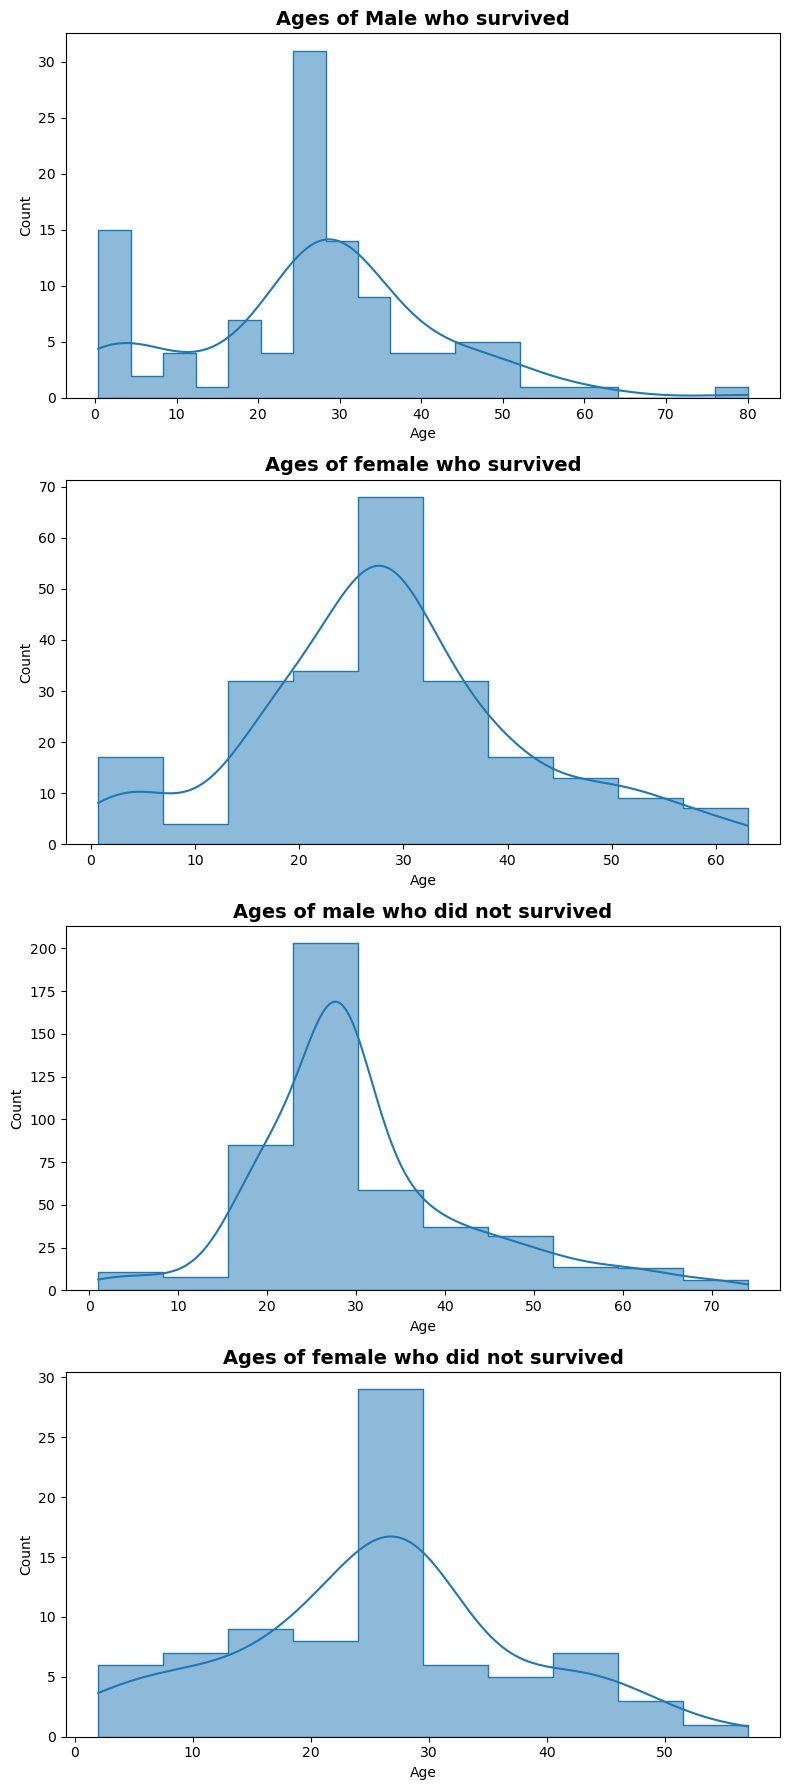

In [19]:
fig ,ax=plt.subplots(4,1,figsize=(8,18)) 
a=sns.histplot(data=df[(df['Survived']==1)&(df['Sex']=='male')],x='Age',bins=20,element='step',
               kde=True,ax=ax[0]);
a.set_title('Ages of Male who survived',size=14,fontweight='bold')

b=sns.histplot(data=df[(df['Survived']==1)&(df['Sex']=='female')],x='Age',bins=10,element='step',
               kde=True,ax=ax[1]);
b.set_title('Ages of female who survived',size=14,fontweight='bold')

c=sns.histplot(data=df[(df['Survived']==0)&(df['Sex']=='male')],x='Age',bins=10,element='step',
               kde=True,ax=ax[2]);
c.set_title('Ages of male who did not survived',size=14,fontweight='bold')

d=sns.histplot(data=df[(df['Survived']==0)&(df['Sex']=='female')],x='Age',bins=10,element='step',
               kde=True,ax=ax[3]);
d.set_title('Ages of female who did not survived',size=14,fontweight='bold')

plt.tight_layout()

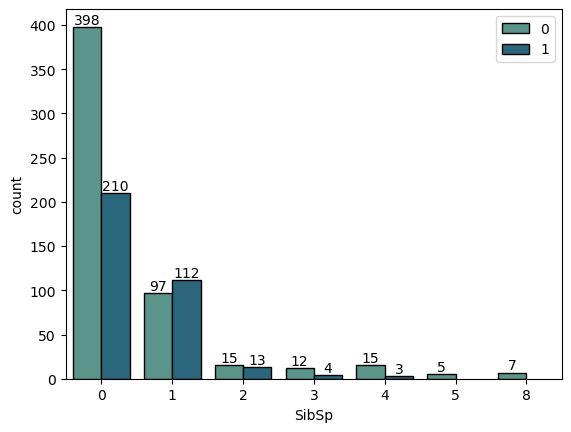

In [20]:
a=sns.countplot(data=df,x='SibSp',hue='Survived',palette='crest',ec='black')
a.legend(loc='upper right')
for s in a.containers:
        a.bar_label(s);

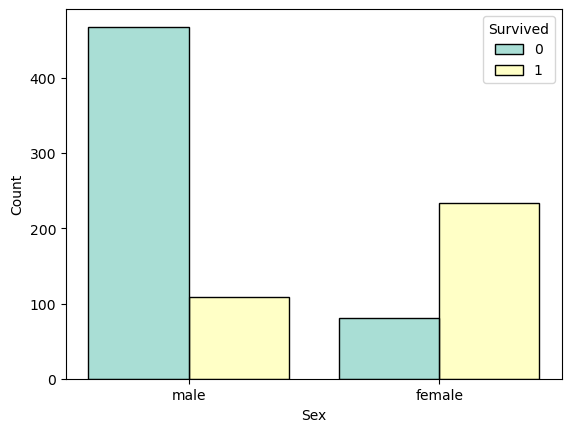

In [21]:
sns.histplot(data=df,x='Sex',hue='Survived',multiple='dodge',shrink=.8,palette='Set3')
plt.show()

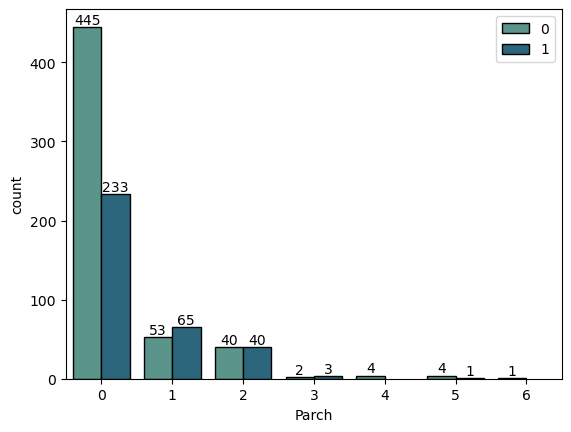

In [22]:
a=sns.countplot(data=df,x='Parch',hue='Survived',palette='crest',ec='black')
a.legend(loc='upper right')
for s in a.containers:
        a.bar_label(s);

# Data Modeling
#### Drop unused column

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [24]:
data=df.drop(['Name','Ticket'],axis=1)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [26]:
data["Sex"]=data['Sex'].astype('category')
data["Sex"]=data["Sex"].cat.codes

data["Embarked"]=data['Embarked'].astype('category')
data["Embarked"]=data["Embarked"].cat.codes

In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## Selecting the independent and dependent Features¶

In [28]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [29]:
print(x.shape)
print(y.shape)

(891, 8)
(891,)


## Split data to train and split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

### Scaled Data

In [31]:
scale=StandardScaler()

In [32]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

In [33]:
reg=LogisticRegression(C=.05)

In [34]:
reg.fit(x_train_scaled,y_train)

LogisticRegression(C=0.05)

In [35]:
Y_pred_test=reg.predict(x_test_scaled)

In [36]:
reg.score(x_test_scaled,y_test)

0.7978723404255319

In [37]:
metrics.accuracy_score(y_test,Y_pred_test)

0.7978723404255319

### Improve the model


In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [39]:
x_scaled=scale.fit_transform(x)

In [40]:
CrossV=cross_val_score(LogisticRegression(max_iter=1000,C=.008,),x_scaled,y,cv=7)

In [44]:
mean_crossv_LR=sum(CrossV)/len(CrossV)*100
mean_crossv_LR=round(mean_crossv_LR,5)
mean_crossv_LR

80.47402

In [42]:
print(" Avarage of accuracy for all ",np.mean(CrossV)*100)
print("Accuracy for each split", CrossV*100)

 Avarage of accuracy for all  80.47402277840271
Accuracy for each split [79.6875     78.90625    83.46456693 80.31496063 80.31496063 78.74015748
 81.88976378]
